Vincent Tran

SES 350

Final Project - Simulating Basketball

## Loading Statistical Data and Filtering It

In [1]:
import pandas as pd
from random import randrange
import matplotlib.pyplot as plt
import numpy as np

Import a csv file that has nba stats by team for every game from  2014-2018:

In [2]:
full_stats = pd.read_csv("nba.games.stats.csv")

This data was found on https://www.kaggle.com/ionaskel/nba-games-stats-from-2014-to-2018

Filter the full downloaded stats down to only show these stats from the 2017-2018 season:

- Team
- Date
- Points scored
- FG% (Field goal percentage, aka 2 point shots)
- 3Pt% (3 point percentage)
- FTA (Free throws attempted)
- FT% (Free throw percentage)



In [3]:
stats = full_stats[['Team', 'Date', 'TeamPoints', 'FieldGoals.', 'X3PointShots.', 'FreeThrowsAttempted', 'FreeThrows.']]

stats['Date'] =  pd.to_datetime(stats['Date'])

start_date = '10/1/2017'
end_date = '5/31/2018'

stats = stats.loc[(stats['Date'] > start_date) & (stats['Date'] <= end_date)]

C:\Users\Vht57\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Create a list of every team in the NBA:

In [4]:
teams_list = ['DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 'NOP', 'OKC', 'PHX', 'POR', 'SAC', 'SAS', 'UTA', 'ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DET', 'IND', 'MIA', 'MIL', 'NYK', 'ORL', 'PHI', 'TOR', 'WAS']

west_teams = teams_list[:len(teams_list)//2]
east_teams = teams_list[len(teams_list)//2:]

The downloaded stats that we filtered include numbers from every game in the 2017-2018 season. We can use those stats to calculate the average stats throughout the season for each team

Define a function to get the average points per game (PPG), FG%, 3Pt%, FTA, and FT% for any team:

In [5]:
def get_PPG(team_name):
    team_PPG = stats.loc[stats['Team'] == team_name, 'TeamPoints'].mean()
    return team_PPG

def get_FGP(team_name):
    team_FGP = stats.loc[stats['Team'] == team_name, 'FieldGoals.'].mean() * 100
    return team_FGP

def get_3PP(team_name):
    team_3PP = stats.loc[stats['Team'] == team_name, 'X3PointShots.'].mean() * 100
    return team_3PP

def get_FTA(team_name):
    team_FTA = stats.loc[stats['Team'] == team_name, 'FreeThrowsAttempted'].mean()
    return team_FTA

def get_FTP(team_name):
    team_FTP = stats.loc[stats['Team'] == team_name, 'FreeThrows.'].mean() * 100
    return team_FTP

Call each function for every team and store the numbers in lists:

In [6]:
league_PPG = []
league_FGP = []
league_3PP = []
league_FTP = []
league_FTA = []

for team_name in teams_list:
    
    team_PPG = get_PPG(team_name)
    league_PPG.append(team_PPG)
    
    team_FGP = get_FGP(team_name)
    league_FGP.append(team_FGP)
    
    team_3PP = get_3PP(team_name)
    league_3PP.append(team_3PP)
    
    team_FTA = get_FTA(team_name)
    league_FTA.append(team_FTA)
    
    team_FTP = get_FTP(team_name)
    league_FTP.append(team_FTP)
    

There were some stats I needed that were unavailable to download, so I had to manually enter these categories (in the same order as the team list):

- Time of posession (in seconds)
- 3 point frequency (3 pointers attempted per 100 possessions)
- Turnover Percentage (turnovers per 100 possessions)


In [7]:
ToP_list = [15.4, 14.7, 13.6, 14.4, 14.2, 13.7, 15.4, 15.3, 13.6, 14.2, 14.2, 15.2, 15.4, 15.5, 15.2, 14.6, 15.0, 14.7, 14.6, 14.2, 14.5, 14.9, 14.8, 15.2, 14.3, 14.9, 14.6, 13.9, 14.5, 14.8]

freq_3pt = [38.2, 35.7, 34.0, 50.2, 31.4, 32.9, 31.7, 26.1, 31.9, 34.5, 32.0, 32.4, 27.8, 28.2, 35.7, 36.3, 35.7, 41.1, 31.4, 35.0, 37.9, 33.3, 28.4, 35.8, 29.7, 26.6, 34.2, 34.4, 37.7, 31.0]

TO_percen = [11.6, 13.4, 14.1, 12.7, 13.2, 13.8, 14.0, 11.4, 13.3, 12.4, 13.9, 12.3, 12.8, 12.2, 13.7, 14.1, 13.0, 13.6, 11.4, 12.6, 12.6, 12.3, 12.3, 13.3, 12.9, 13.3, 13.3, 14.6, 12.1, 13.3]

I also manually entered the actual results from the 2017-2018 season as a dataframe to compare to the simulation results later on

In [8]:
real_wins = [24, 46, 58, 65, 42, 35, 22, 47, 48, 48, 21, 49, 27, 47, 48, 24, 55, 28, 36, 27, 50, 39, 48, 44, 44, 29, 25, 52, 59, 43]

real_results = pd.DataFrame(list(zip(teams_list, real_wins)), columns = ['Team', 'W'])
real_results.set_index("Team", inplace = True)

Create a new data table that shows each team's average stats that we calculated:

In [9]:
avg_stats = pd.DataFrame(list(zip(teams_list, league_PPG, league_FGP, league_3PP, league_FTA, league_FTP, freq_3pt, TO_percen, ToP_list)), columns = ['Team', 'PPG', 'FG%', '3Pt%', 'FTA', 'FT%', '3Pt Freq%', 'TO%', 'ToP'])
avg_stats.set_index("Team", inplace = True)

In [10]:
avg_stats

,PPG,FG%,3Pt%,FTA,FT%,3Pt Freq%,TO%,ToP
Team,,,,,,,,
DAL,102.317073,44.562195,36.089024,18.658537,76.318293,38.2,11.6,15.4
DEN,110.000000,47.034146,36.720732,22.353659,76.937805,35.7,13.4,14.7
GSW,113.463415,50.342683,38.880488,20.341463,81.392683,34.0,14.1,13.6
HOU,112.353659,46.030488,36.382927,25.134146,78.023171,50.2,12.7,14.4
LAC,108.987805,47.296341,35.115854,25.548780,73.931707,31.4,13.2,14.2
LAL,108.073171,46.089024,33.997561,23.292683,71.845122,32.9,13.8,13.7
MEM,99.329268,44.425610,35.098780,21.121951,78.209756,31.7,14.0,15.4
MIN,109.512195,47.751220,35.800000,24.146341,80.232927,26.1,11.4,15.3
NOP,111.719512,48.432927,35.943902,20.926829,77.435366,31.9,13.3,13.6


In [11]:
avg_stats.loc['DEN', '3Pt%'] #testing our dataframe

36.72073170731708

In [12]:
avg_stats.loc['DEN', :]

PPG          110.000000
FG%           47.034146
3Pt%          36.720732
FTA           22.353659
FT%           76.937805
3Pt Freq%     35.700000
TO%           13.400000
ToP           14.700000
Name: DEN, dtype: float64

## Assumptions

Given that the stats we are using only cover the offensive side of the ball, the simulation will be purely based on offense. The following assumptions are made for the simulation:

- Team stats are based off team averages from the entire 2017-2018 regular season, so each team performs in each game according to those averages
- Stats and simulation do not account for injuries, substitutions, and varying game situations (i.e. late game intentional fouling)
- Each simulated possession will end in either a 2 point shot attempt, 3 point shot attempt, or an offensive turnover
- On every possession, each team posesses the ball for as long as their average time of possession in the 2017-2018 season. For simplicity, there are no situations where a team will shoot/turnover the ball before or after this average time
- Free throws are accounted for at the end of each game based on how many free throws each team attempted on average and their free throw percentage during the 2017-2018 season
- Common (non-shooting fouls) do not occur during the simulation
- Following a missed shot, the opposing team automatically takes the next possession. Rebounding is not a factor
- Defensive stats and factors are not taken into account for
- Each team will play a random opposing team in the NBA for each game, rather than a set schedule based on divisions and conferences

## Using the Data To Simulate a Possession

Define functions that simulate a single three point shot, two point shot, or free throw for a team. The functions generate a random number from [0, 100] and decides if the team makes the shot depending on the team's percentages in relation to the random number. 

In [13]:
def threepointshot(team):
    """Simulates a 3 Point Shot"""
    
    threePT_perc = avg_stats.loc[team, '3Pt%']
    bucket = 0 #this variable represents how many points are scored by the shot
    if randrange(0, 100) < threePT_perc:
        bucket = 3
    else:
        bucket = 0
    return bucket

def twopointshot(team):
    """Simulates a 2 point shot"""
    
    fg_perc = avg_stats.loc[team, 'FG%']
    bucket = 0
    if randrange(0, 100) < fg_perc:
        bucket = 2
    else:
        bucket = 0
    return bucket

def freethrow(team):
    """Simulates 1 free throw shot"""
    
    ft_perc = avg_stats.loc[team, 'FT%']
    bucket = 0
    if randrange(0, 100) < ft_perc:
        bucket = 1
    else:
        bucket = 0
    return bucket

This function will be used to simulate free throws at the end of each game

In [14]:
def sim_freethrows(team):
    """Simulates how many free throws each team takes"""
    
    FT_made = 0
    FTA = avg_stats.loc[team, 'FTA']
    for i in range(int(FTA)):
        bucket = freethrow(team)
        FT_made = FT_made + bucket
    return FT_made   

First, we will simulate one possession. Each possession either ends in a 2 point shot attempt, 3 point shot attempt, or turnover; these options are decided by each team's statistical tendencies (3Pt frequency, TO%).

In [15]:
def possession(team):
    """Simulates one Possession"""
    
    #First, we have to gather the tendencies of each team (how often they shoot a 2, a 3, or turn it over:
    
    threePT_freq = avg_stats.loc[team, '3Pt Freq%']
    TO_freq = avg_stats.loc[team, 'TO%']
    time_used = avg_stats.loc[team, 'ToP']
    
    #initialize a random number that will be used with each team's tendencies to determine the result of the possession
    
    random_number = randrange(0, 100) 
    points_scored = 0
    
    if random_number < TO_freq: #a turnover results in 0 points scored
        bucket = 0
    elif random_number < threePT_freq: #the team takes a 3 point shot
        bucket = threepointshot(team)
    else:
        bucket = twopointshot(team) #if the reuslt isn't a 3 or a turnover, then a two point shot is taken
    
    points_scored = bucket
    
    return points_scored, time_used

Here's an example of what possession() can give us

In [16]:
points_scored, time_used = possession('DEN')
print("In one possession, Denver scored {0} points, taking {1} seconds".format(points_scored, time_used))

In one possession, Denver scored 0 points, taking 14.7 seconds


## Simulating a Full Game Between Two Teams

The overtime function is created in the event that the game is tied at the end of regulation

In [17]:
def overtime(team1, team2):
    """Simulates an overtime period if necessary"""
    
    OT_clock = 0
    team1_OT_score = 0
    team2_OT_score = 0
        
    while OT_clock < 300: #there are 300 seconds in an overtime period
    
        points_scored1, time_used = possession(team1)
        OT_clock = OT_clock + time_used
        team1_OT_score = team1_OT_score + points_scored1
    
        points_scored2, time_used = possession(team2)
        OT_clock = OT_clock + time_used
        team2_OT_score = team2_OT_score + points_scored2
    
    return team1_OT_score, team2_OT_score

Now we can simulate an entire game between two teams using the functions previously defined. The game ends when the game clock reaches 48 minutes (2880 seconds). If the game is tied after that time, 5 minute overtimes are played until somebody wins

In [18]:
def sim_one_game(team1):
    """Simulates one game between two teams and decides who wins"""

    game_clock = 0 #starts the game clock at 0
    team1_score = 0
    team2_score = 0
    
    team1_win = False #initialize the result of the game
    team2_win = False
    in_overtime = False #to keep track if the game goes to overtime
    
    team2 = teams_list[randrange(1, 30)] #sets the opponent as a random team in the league
    
    if team1 == team2: #if the two teams are identical, another team is generated so ensure no team plays itself
        team2 = teams_list[randrange(1, 30)]
    
    while game_clock < 2880: #there are 2880 seconds in a game
    
        #Team one has first possession
        
        points_scored1, time_used = possession(team1)
        game_clock = game_clock + time_used
        team1_score = team1_score + points_scored1
    
        points_scored2, time_used = possession(team2)
        game_clock = game_clock + time_used
        team2_score = team2_score + points_scored2
    
    #At the end of each game, we have to add the free throws by each team using their per game average stats:
    
    team1_FTs = sim_freethrows(team1)
    team2_FTs = sim_freethrows(team2)
    
    team1_score = team1_score + team1_FTs
    team2_score = team2_score + team2_FTs    
    
        
    if team1_score == team2_score: # if the score is tied at the end of the game, the overtime period is played
        team1_OT_score, team2_OT_score = overtime(team1, team2)
        team1_score = team1_score + team1_OT_score
        team2_score = team2_score + team2_OT_score  
        in_overtime = True
    
    #To determine who wins the game:
    
    if team1_score > team2_score:
        team1_win = True
        team2_win = False
    elif team2_score > team1_score:
        team1_win = False
        team2_win = True
    
    #print("{0} score: {1}".format(team1, team1_score))
    #print("{0} score: {1}".format(team2, team2_score))
    
    return team1, team2, team1_score, team2_score, team1_win, team2_win, in_overtime

Here's an example of what sim_one_game() can give us

In [19]:
team1, team2, team1_score, team2_score, team1_win, team2_win, in_overtime = sim_one_game('DEN')
print("{0} vs. {1}".format(team1, team2))
print("Score: {0}-{1}".format(team1_score, team2_score))
print("Overtime:", in_overtime)


DEN vs. POR
Score: 113-112
Overtime: False


Now, we can simulate an entire 82 game season for each team in the league, calculate some of their data (PPG, overtime games), and store the results in a dataframe

In [20]:
def sim_season():
    """Simulates An 82 Game Season For Each Team"""

    nba_results = []
    sim_wins = []
    sim_PPG = []

    for team in teams_list:
        team_wins = 0
        OT_games = 0
        team_scores = []
        for i in range(82):
            team1, team2, team1_score, team2_score, team1_win, team2_win, in_overtime = sim_one_game(team)
            if team1_win == True:
                team_wins = team_wins + 1
            if in_overtime == True:
                OT_games = OT_games + 1
            team_scores.append(team1_score)
    
        team_losses = 82 - team_wins
        win_pct = team_wins / 82
        team_PPG = sum(team_scores) / len(team_scores)
    
        nba_results.append({'Team': team, 'W': team_wins, 'L': team_losses, 'Pct': win_pct, 'PPG': team_PPG, 'OT Games': OT_games})
        sim_wins.append(team_wins) #for later comparison with real-life wins
        sim_PPG.append(team_PPG) #for later comparison
        
    return nba_results, sim_wins, sim_PPG

In [21]:
nba_results, sim_wins, sim_PPG = sim_season()

##### Note:

If you come back to this simulation after running the entire code, make sure to first run the cell beneath. This is because later on, this cell is modified so it will alter the original simulation if it is not reset

In [22]:
freq_3pt = [38.2, 35.7, 34.0, 50.2, 31.4, 32.9, 31.7, 26.1, 31.9, 34.5, 32.0, 32.4, 27.8, 28.2, 35.7, 36.3, 35.7, 41.1, 31.4, 35.0, 37.9, 33.3, 28.4, 35.8, 29.7, 26.6, 34.2, 34.4, 37.7, 31.0]

avg_stats = pd.DataFrame(list(zip(teams_list, league_PPG, league_FGP, league_3PP, league_FTA, league_FTP, freq_3pt, TO_percen, ToP_list)), columns = ['Team', 'PPG', 'FG%', '3Pt%', 'FTA', 'FT%', '3Pt Freq%', 'TO%', 'ToP'])
avg_stats.set_index("Team", inplace = True)

## Simulation Results

In [23]:
standings = pd.DataFrame(nba_results)
standings.set_index("Team", inplace = True)
standings.round({"Pct":3, "PPG":1}).sort_values(by=["W"], ascending = False)

,W,L,Pct,PPG,OT Games
Team,,,,,
CLE,58,24,0.707,106.0,2
GSW,56,26,0.683,108.9,2
HOU,55,27,0.671,106.4,0
CHA,52,30,0.634,106.1,2
MIL,50,32,0.610,103.5,1
MIN,50,32,0.610,102.2,4
WAS,47,35,0.573,100.0,3
LAC,47,35,0.573,105.3,1
NOP,46,36,0.561,105.7,1


- As the simulated results show, the general rule is the more PPG a team scores, the more wins they have. This correlation makes sense because the simulation is purely based off of a team's offensive performance. 

- In the actual 2017-2018 season, the Golden State Warriors lead the league with 113.5 PPG and ended up winning the championship, largely in part due to their unstoppable offense

- On average, about 6% of NBA games go to overtime, or 4-5 each season. The simulation results show that some teams are around this average while others are not, likely because overtime is extremely random and difficult to predict

## Comparing the Simulation Results to Real Life

Create a new dataframe to compare the win total for each team from the simulation to that of the actual 2017-2018 season

In [24]:
compare_wins = pd.DataFrame(list(zip(teams_list, sim_wins, real_wins)), columns = ['Team', 'Sim Wins', 'Real Wins'])
compare_wins.set_index("Team", inplace = True)

In [25]:
compare_wins

,Sim Wins,Real Wins
Team,,
DAL,39,24
DEN,39,46
GSW,56,58
HOU,55,65
LAC,47,42
LAL,34,35
MEM,36,22
MIN,50,47
NOP,46,48


I would like to create a plot of this dataframe, so first I divide the data into the Western and Eastern conferences and create two plots (all the data on one plot would be crowded)

In [26]:
sim_wins_w = sim_wins[:len(sim_wins)//2]
sim_wins_e = sim_wins[len(teams_list)//2:]
real_wins_w = real_wins[:len(real_wins)//2]
real_wins_e = real_wins[len(teams_list)//2:]

In [27]:
west_compare = pd.DataFrame(list(zip(west_teams, sim_wins_w, real_wins_w)), columns = ['Team', 'Sim Wins', 'Real Wins'])
west_compare.set_index("Team", inplace = True)

east_compare = pd.DataFrame(list(zip(east_teams, sim_wins_e, real_wins_e)), columns = ['Team', 'Sim Wins', 'Real Wins'])
east_compare.set_index("Team", inplace = True)

Now we can make a function to create a bar plot that compares the wins in the simulation to real life

In [28]:
def compare_plot(df, x, y, cat1, cat2, title):
    """Creates a Bar Plot Comparing 2 Categories"""

    pos = list(range(len(df[cat1])))
    width = 0.25

    fig, ax = plt.subplots(figsize = (10,5))

    plt.bar(pos, df[cat1], width, label = cat1)

    plt.bar([p + width for p in pos], df[cat2], width, label = cat2)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

    ax.set_xticks(range(df.shape[0]))

    ax.set_xticklabels(df.index, rotation = 90)
    
    plt.legend(loc = 'best')

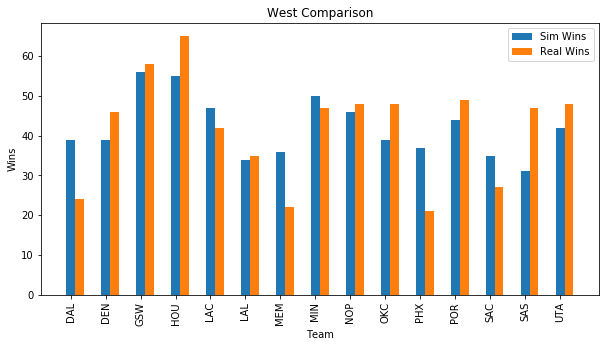

In [29]:
compare_plot(west_compare, 'Team', 'Wins','Sim Wins', 'Real Wins', 'West Comparison')

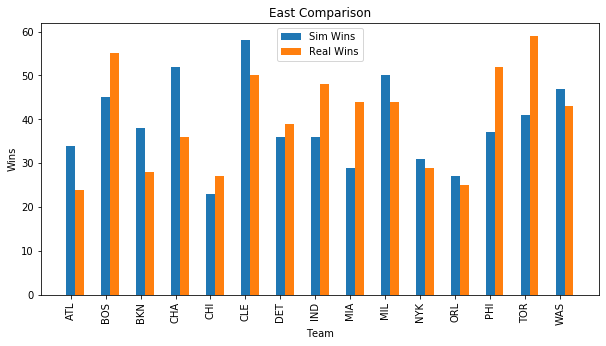

In [30]:
compare_plot(east_compare, 'Team', 'Wins','Sim Wins', 'Real Wins', 'East Comparison')

For most teams, the simulation resulted in a similar amount of wins as in real life during the 2017-2018 season. There are a few outliers where the win counts don't match up because the simulation makes a lot of assumptions about basketball--therefore making it not completely realistic

Defense is a huge part of the NBA, and since the simulation does not account for that, teams like Toronto and San Antonio who are strong defensively but not as strong offensively will usually have a lower win count in the simulation compared to real-life. On the other hand, offensive-centric teams like Atlanta and Minnesota will normally have higher win counts in the simulation.

## Investigating an Interesting Question

Since 2014-2015, the Golden State Warriors have dominated the league through their 3 point shooting. They have built their team around a fast-paced, sharpshooting offense that not only shoots more 3s than anyone in history, but makes them at a high percentage. Ever since, the rest of the league has been trying to duplicate their success by shooting more 3 pointers.

The question is whether taking more 3 point shots is worth the risk, since they are lower percentage shots than 2 pointers.

We can investigate this by first increasing the 3 point frequency in the simulation by 50%

In [31]:
freq_3pt = [i * 1.5 for i in freq_3pt]

#since we altered freq_3pt, we have to rerun the generation of avg_stats where that stat is located
avg_stats = pd.DataFrame(list(zip(teams_list, league_PPG, league_FGP, league_3PP, league_FTA, league_FTP, freq_3pt, TO_percen, ToP_list)), columns = ['Team', 'PPG', 'FG%', '3Pt%', 'FTA', 'FT%', '3Pt Freq%', 'TO%', 'ToP'])
avg_stats.set_index("Team", inplace = True)

In [32]:
nba_results_more3, sim_wins_more3, PPG_more3 = sim_season()

Here are the results of the simulation with 3 point frequency raised by 50%

In [33]:
standings_more3= pd.DataFrame(nba_results_more3)
standings_more3.set_index("Team", inplace = True)
standings_more3.round({"Pct":3, "PPG":1}).sort_values(by=["PPG"], ascending = False)

,W,L,Pct,PPG,OT Games
Team,,,,,
HOU,58,24,0.707,114.9,2
GSW,56,26,0.683,110.7,3
CLE,59,23,0.720,109.1,4
CHA,55,27,0.671,108.3,4
LAC,43,39,0.524,107.1,1
NOP,42,40,0.512,106.6,1
MIN,53,29,0.646,105.9,2
MIL,40,42,0.488,104.6,0
BOS,49,33,0.598,104.5,3


As the table shows, increasing the amount of 3s taken by 50% resulted in an increase in PPG around the league.

If we want to further investigate the effect, we can now increase the amount of 3s taken (from the original stats) by 150% and compare the results

In [34]:
freq_3pt = [i * 2.5 for i in freq_3pt]

avg_stats = pd.DataFrame(list(zip(teams_list, league_PPG, league_FGP, league_3PP, league_FTA, league_FTP, freq_3pt, TO_percen, ToP_list)), columns = ['Team', 'PPG', 'FG%', '3Pt%', 'FTA', 'FT%', '3Pt Freq%', 'TO%', 'ToP'])
avg_stats.set_index("Team", inplace = True)

In [35]:
nba_results_x250, sim_wins_x250, PPG_x250 = sim_season()

In [36]:
standings_x250= pd.DataFrame(nba_results_x250)
standings_x250.set_index("Team", inplace = True)
standings_x250.round({"Pct":3, "PPG":1}).sort_values(by=["PPG"], ascending = False)

,W,L,Pct,PPG,OT Games
Team,,,,,
GSW,51,31,0.622,119.3,3
CHA,56,26,0.683,119.0,3
CLE,60,22,0.732,117.6,0
HOU,51,31,0.622,117.2,2
BOS,52,30,0.634,115.6,1
DET,52,30,0.634,114.6,1
MIL,46,36,0.561,113.9,4
WAS,42,40,0.512,113.1,0
LAC,50,32,0.610,112.5,2


Based on this table, each team's PPG does inflate. We can make a plot to compare all 3 data sets (original sim, 50% more 3s, 150% more 3s)

Make a dataframe that combines the PPGs from each iteration

In [37]:
compare_3s = pd.DataFrame(list(zip(teams_list, sim_PPG, PPG_more3, PPG_x250)), columns = ['Team', 'Original', '50% more 3s', '150% more 3s'])
compare_3s.set_index("Team", inplace = True)

Modify the compare_plot() function since we are now comparing 3 categories instead of two

In [38]:
def compare_more(df, x, y, cat1, cat2, cat3, title):
    """Creates a Bar Plot Comparing 3 Categories"""
    pos = list(range(len(df[cat1])))
    width = 0.25

    fig, ax = plt.subplots(figsize = (10,5))

    plt.bar(pos, df[cat1], width, label = cat1)

    plt.bar([p + width for p in pos], df[cat2], width, label = cat2)
    plt.bar([p + width *2 for p in pos], df[cat3], width, label = cat3)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

    ax.set_xticks(range(df.shape[0]))

    ax.set_xticklabels(df.index, rotation = 90)
    
    plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')

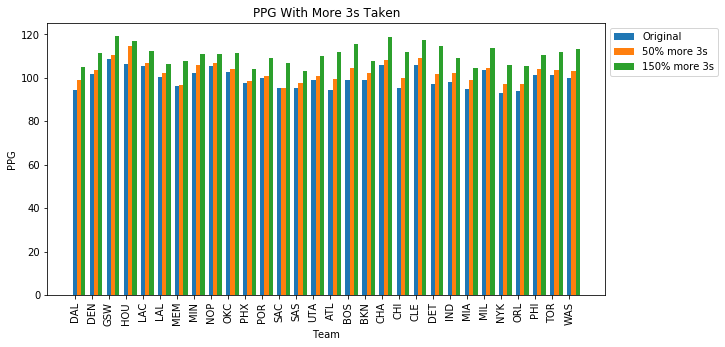

In [39]:
compare_more(compare_3s, 'Team', 'PPG','Original', '50% more 3s', '150% more 3s', 'PPG With More 3s Taken')

Clearly, this plot shows increasing the amount of threes taken increases PPG leaguewide. For the purpose of this simulation, we can conclude that taking more 3 pointers will result in more points scored, and therefore a higher chance of winning.

This doesn't necessarily translate to real-life, since the simulation does not account for defense (among other factors). The tradeoff here is points socred vs. risk of taking 3s vs. defensive factors; every NBA team must examine it and decide how to build their team. The game has changed to be 3-point centric over the years, and this simulation certainly defends that movement

## Results of Repeating the Simulation Many Times

Now we can repeat the simulation many times to get an average performance from each team

To reset our 3 point frequency to normal (before increasing it in our previous investigation):

In [40]:
freq_3pt = [38.2, 35.7, 34.0, 50.2, 31.4, 32.9, 31.7, 26.1, 31.9, 34.5, 32.0, 32.4, 27.8, 28.2, 35.7, 36.3, 35.7, 41.1, 31.4, 35.0, 37.9, 33.3, 28.4, 35.8, 29.7, 26.6, 34.2, 34.4, 37.7, 31.0]

avg_stats = pd.DataFrame(list(zip(teams_list, league_PPG, league_FGP, league_3PP, league_FTA, league_FTP, freq_3pt, TO_percen, ToP_list)), columns = ['Team', 'PPG', 'FG%', '3Pt%', 'FTA', 'FT%', '3Pt Freq%', 'TO%', 'ToP'])
avg_stats.set_index("Team", inplace = True)

Create a new dataframe to store our repeated results in

In [41]:
repeat_results = pd.DataFrame(list(teams_list), columns = ['Team'])
repeat_results.set_index("Team", inplace = True)
sim_number = "Wins in Sim #"

Run the simulation 8 times (I found this was the most reasonable amount when considering run time and space on the dataframe). Add the results from each iteration to our dataframe

In [42]:
for i in range(8):
    nba_results, sim_wins, sim_PPG = sim_season()
    repeat_results[sim_number + str(i + 1)] = np.array(sim_wins)

Results:

In [43]:
col = repeat_results.loc[: , "Wins in Sim #1":"Wins in Sim #8"]
repeat_results['Avg Wins'] = col.mean(axis = 1)
repeat_results['Real Wins'] = np.array(real_wins)
repeat_results.round({"Avg Wins":1}).sort_values(by=["Avg Wins"], ascending = False)

,Wins in Sim #1,Wins in Sim #2,Wins in Sim #3,Wins in Sim #4,Wins in Sim #5,Wins in Sim #6,Wins in Sim #7,Wins in Sim #8,Avg Wins,Real Wins
Team,,,,,,,,,,
GSW,61,56,57,49,58,56,55,58,56.2,58
HOU,57,55,48,56,53,54,57,59,54.9,65
CLE,56,56,48,49,55,41,57,58,52.5,50
MIN,50,50,55,48,60,51,51,51,52.0,47
CHA,49,58,45,51,47,53,50,51,50.5,36
DEN,55,52,46,51,45,44,44,37,46.8,46
MIL,43,42,50,51,45,48,50,45,46.8,44
TOR,54,34,49,48,43,47,46,46,45.9,59
LAC,42,42,46,53,44,51,41,43,45.2,42


Call the compare_plot() function we previously used to compare the win totals

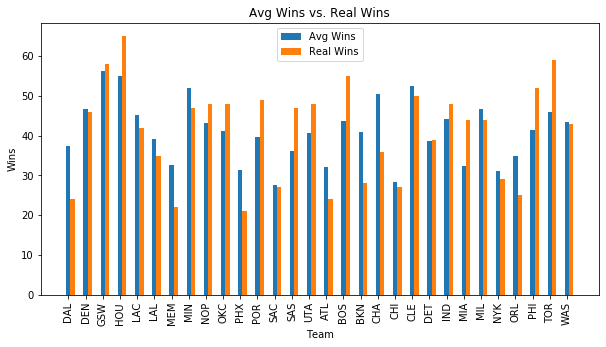

In [44]:
compare_plot(repeat_results, 'Team', 'Wins','Avg Wins', 'Real Wins', 'Avg Wins vs. Real Wins')

The plot shows that the simulation is fairly accurate, with the top teams (GSW, HOU, CLE) mirroring that of the actual 2017-2018 season. There are still some descrepencies between the simulation and real life results--but as previously discussed--this is expected